# Region of Interest Investigation
Investigating which RoI is best for us.

# Abstract Information
## Goals for this notebook
+ Identify spatiotemporal region-of-interests (RoIs) to use as case-studies
    + RoIs should have lots of data
    + RoIs should have a scientifically interesting “data story”
+ Identify potential publication venues

## things we have now
+ Phytoplankton, and zooplankton <- makes the most sense, as they are most impacted due to physical and climatic conditions.
+ we can get these kind of things out of OBIS and pull and produce some research
    + refish (RVCs) monitoring program, most of the nodes are fixed they dont travel much
    + https://obis.org/dataset/afef5da2-614b-4208-aee6-c2413ed5ab76 <- to this data, they are still collecting. 
    + CRAMP is another most common project. <- on corals
    + the bottom cover analysis is promising.
    + another research being conducted involving eDNA, phytoplankton dataset based on ratio of different pigments.

### what we can do?
+ Identifying region
    + europe and north atlantic, california has got good data,
    + region below Africa is an interesting and recent scape
    + region below Australia is also interesting
    + **Florida Keys** <- most of the people are interested into Corals.
+ time series analysis <- seasonal decomposition
+ or, species distribution model (people have done more)
+ main question -> how was diversity changing over years in the keys?

### interesting things
+ need to have a breif about recent biodiversity events
    + lionfish appeared in florida keys, lots of concern
        + very invasive: but numbers of stablized over years
+ Interesting Scholar -> https://scholar.google.com/citations?hl=en&user=iQn7B_QAAAAJ&view_op=list_works&sortby=pubdate
+ good repo to gain inspiration from -> https://github.com/cestes-19/RVC

### things to keep in mind
+ Must involve Seascapes for -> dimensionality reduction,
    + Useful for species modelling, seascapes change over time; moving ecosystem
+ also figure out if MoFs are present in the RoI.

### challenges we will face
+ find the best region and the best species
+ to battle sampling bias is a huge challenge
+ people want to do forecast, but that is a very difficult and big problem
    + need high amount of data for the right forecast

# Analysis

### importing necessary modules and setting up right variables

In [1]:
try:
    import pyobis
except:
    %pip install -q pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import cartopy as crt
import geoplot as gplt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
from pyobis.occurrences import OccQuery
occ = OccQuery()

In [4]:
rcParams['figure.figsize'] = (15,10)

### RoI: Florida Keys
> Fetch Data

In [7]:
fl_df = occ.search(geometry="POLYGON ((-80.1374 25.8944, -80.1850 25.8153, -80.2472 25.7066, -80.3204 25.5713,\
                   -80.3534 25.4722, -80.3790 25.3862, -80.3790 25.3300, -80.4632 25.2473, -80.5950 25.2042,\
                    -80.7451 25.1678, -80.8586 25.1844, -80.9392 25.1413, -81.0746 25.1347, -81.1369 25.1844,\
                    -81.1625 25.2440, -81.0856 25.2638, -80.9831 25.2175, -80.9062 25.2241, -80.9392 25.2870,\
                    -80.9758 25.3366, -81.0161 25.3366, -81.1332 25.3829, -81.1881 25.4755, -81.2028 25.5217,\
                    -81.2614 25.6373, -81.3126 25.7527, -81.3565 25.8186, -81.4627 25.8845, -81.6677 25.8746,\
                    -81.7703 25.8648, -81.5799 25.5283, -81.5286 25.2936, -81.5689 25.1446, -81.7519 25.0352,\
                    -81.9423 24.9822, -82.1766 24.9257, -82.3158 24.8926, -82.4110 24.5901, -82.4439 24.4768,\
                    -82.2718 24.2735, -82.1144 24.0798, -81.6275 24.0631, -81.2577 24.0731, -80.7927 24.1867,\
                    -80.5657 24.2902, -80.3058 24.5201, -80.0715 24.8029, -79.8555 25.0021, -79.7859 25.2705,\
                    -79.6944 25.4590, -79.6614 25.6439, -79.6138 25.8252, -79.6028 25.8845, -80.1374 25.8944))",
                  startdate = "1997-01-01",
                  enddate = "2012-12-31")

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 988955/988955
Fetched 988955 records.


In [8]:
fl_df.to_csv("florida-keys-1997-2012.csv")

Let's save this csv data file to kaggle storage, and commit this notebook so that next time we don't download it from the API but directly import into Kaggle - way faster! 32 minutes v/s 11 sec.

**However, this csv file of 988,955 records is of 1.1 GB size.**

#### Question 1: Year-wise Distribution

In [5]:
fl_df = pd.read_csv("../input/obis-florida-keys-occurrence-records-19972012/florida-keys-1997-2012.csv")
fl_df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (49,77,79,95,97,99,100,104,105,112,113,115,117,134,149,150,158,159,160,165,166,167,168,169,170,172,173,174,175,177,178,179,181,182,183,184,185,186,188,189,190,191,192,193,194,196) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,infraphylum,country,date_year,habitat,references,scientificNameID,scientificName,dropped,gigaclassid,...,startDayOfYear,otherCatalogNumbers,footprintSRS,associatedSequences,locationRemarks,behavior,verbatimDepth,taxonConceptID,subtribeid,subtribe
0,0,Gnathostomata,United States,2009,Spur and Groove low Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:276677,Stegastes partitus,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,2011,NaN,https://www.ncei.noaa.gov/erddap/tabledap/deep...,urn:lsid:marinespecies.org:taxname:164811,Demospongiae,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,United States,2008,Deep Fore Reef,NaN,urn:lsid:marinespecies.org:taxname:210726,Millepora alcicornis,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Gnathostomata,United States,2010,Spur and Groove low Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:275764,Halichoeres garnoti,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Gnathostomata,United States,2012,Spur and Groove High Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:276025,Pomacanthus paru,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988950,988950,Gnathostomata,United States,1999,Spur and Groove High Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:159797,Lutjanus griseus,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988951,988951,Gnathostomata,United States,2001,Rubble Low Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:159803,Ocyurus chrysurus,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988952,988952,Gnathostomata,United States,2007,Isolated Medium Relief (Patch),doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:158815,Halichoeres bivittatus,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988953,988953,Gnathostomata,United States,2011,Isolated Medium Relief (Patch),doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:158808,Haemulon plumierii,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fl_df.head()

,Unnamed: 0,infraphylum,country,date_year,habitat,references,scientificNameID,scientificName,dropped,gigaclassid,...,startDayOfYear,otherCatalogNumbers,footprintSRS,associatedSequences,locationRemarks,behavior,verbatimDepth,taxonConceptID,subtribeid,subtribe
0,0,Gnathostomata,United States,2009,Spur and Groove low Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:276677,Stegastes partitus,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,2011,NaN,https://www.ncei.noaa.gov/erddap/tabledap/deep...,urn:lsid:marinespecies.org:taxname:164811,Demospongiae,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,United States,2008,Deep Fore Reef,NaN,urn:lsid:marinespecies.org:taxname:210726,Millepora alcicornis,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Gnathostomata,United States,2010,Spur and Groove low Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:275764,Halichoeres garnoti,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Gnathostomata,United States,2012,Spur and Groove High Relief,doi:10.1016/j.fishres.2011.01.012,urn:lsid:marinespecies.org:taxname:276025,Pomacanthus paru,False,10194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


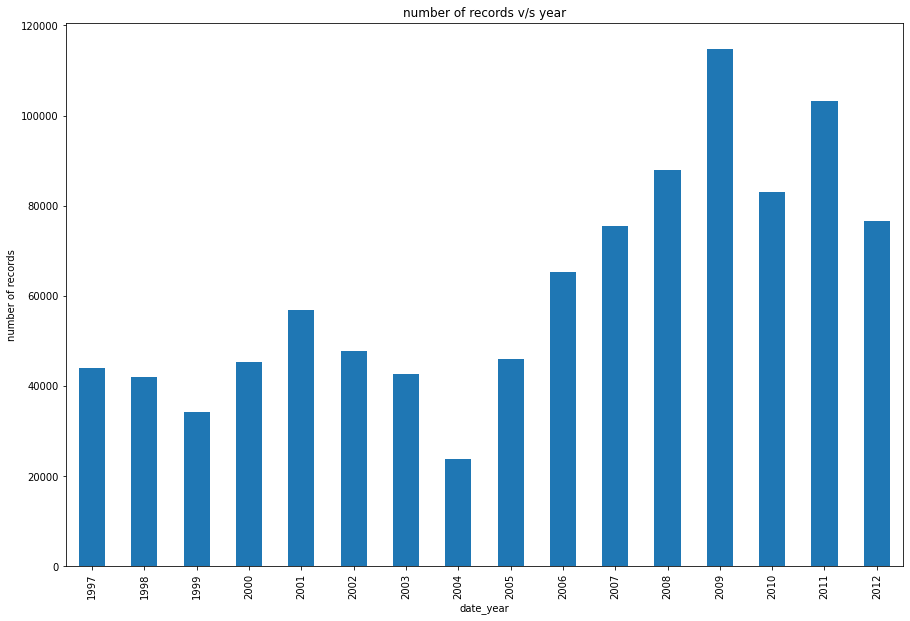

In [13]:
fl_df.groupby("date_year").scientificName.count().plot.bar()
plt.ylabel("number of records")
plt.title("number of records v/s year");

We can see that most records are concentrated after 2005. But there is a near constant significant number of records before 2005 also.

### Question 2: Taxonomic Distribution

<AxesSubplot:ylabel='scientificName'>

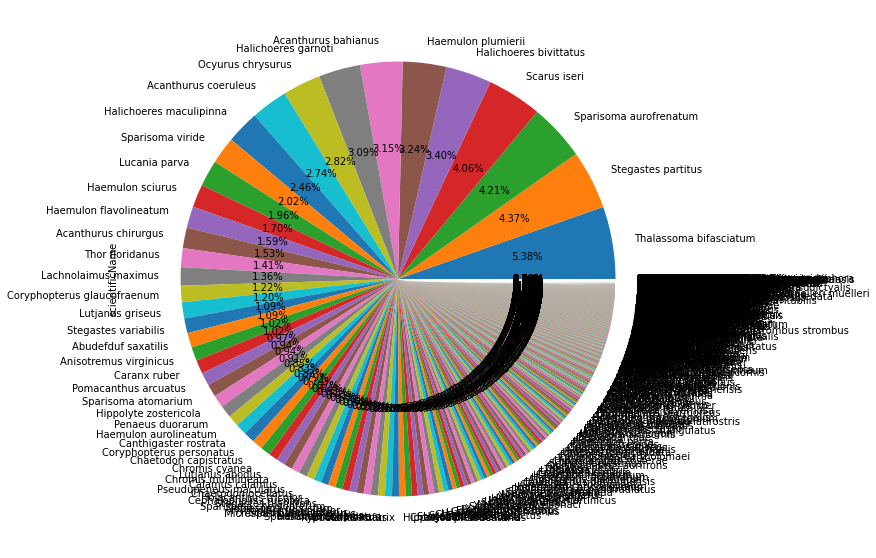

In [18]:
fl_df.groupby("scientificName").scientificName.count().sort_values(ascending=False).plot.pie(autopct="%.2f%%")

Let's see the top twenty.

In [21]:
fl_df.groupby("scientificName").scientificName.count().sort_values(ascending=False).head(20)

scientificName
Thalassoma bifasciatum         53202
Stegastes partitus             43266
Sparisoma aurofrenatum         41612
Scarus iseri                   40189
Halichoeres bivittatus         33584
Haemulon plumierii             32040
Acanthurus bahianus            31170
Halichoeres garnoti            30599
Ocyurus chrysurus              27931
Acanthurus coeruleus           27049
Halichoeres maculipinna        24369
Sparisoma viride               19936
Lucania parva                  19396
Haemulon sciurus               16793
Haemulon flavolineatum         15749
Acanthurus chirurgus           15127
Thor floridanus                13919
Lachnolaimus maximus           13412
Coryphopterus glaucofraenum    12099
Lutjanus griseus               11866
Name: scientificName, dtype: int64